In [1]:
%pylab inline
import numpy as np

import pymech.neksuite as nek
from scipy.interpolate import griddata
import os
from tqdm import tqdm
from matplotlib.colors import LogNorm, SymLogNorm

import sys; sys.path.append('../../../Nek5000_run_files')
from IO import *

POD_prefix = 'midEps'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def interp(field, Cx, Cy, XX, YY, method='linear', mask=None):
    """
    field - 1D array of cell values
    Cx, Cy - cell x-y values
    X, Y - meshgrid x-y values
    """
    ngrid = len(XX.flatten())
    grid_field = np.squeeze(np.reshape(griddata((Cx, Cy), field, (XX, YY), method=method), (ngrid, 1)))
    grid_field = grid_field.reshape(XX.shape)
    
    if mask is not None:
        for m in mask: grid_field[m[1],m[0]] = 0
        
    return grid_field

In [3]:
# Load 
Cx = np.load('../../../Re_17500/Cx.npy')
Cy = np.load('../../../Re_17500/Cy.npy')
mass = np.load('../../../Re_17500/mass.npy')
n = mass.size

In [4]:
nx = 500
ny = 250

x = np.linspace(-0.5,1.25,nx)
y = np.linspace(-0.25,0.25,ny)
XX, YY = np.meshgrid(x, y)

In [5]:
POD_path = '../'
Phi = np.load(POD_path+POD_prefix+'_Phi.npy')
Sigma = np.load(POD_path+POD_prefix+'_Sigma.npy')
Psi = np.load(POD_path+POD_prefix+'_Psi.npy')
mean_flow = np.load(POD_path+'mean_flow.npy')
time = np.load(POD_path+'t_POD.npy')
n = int(Phi.shape[0]/2)

wing_boundary_x, wing_boundary_y = get_wing_boundary(alpha=5, n_points=200)

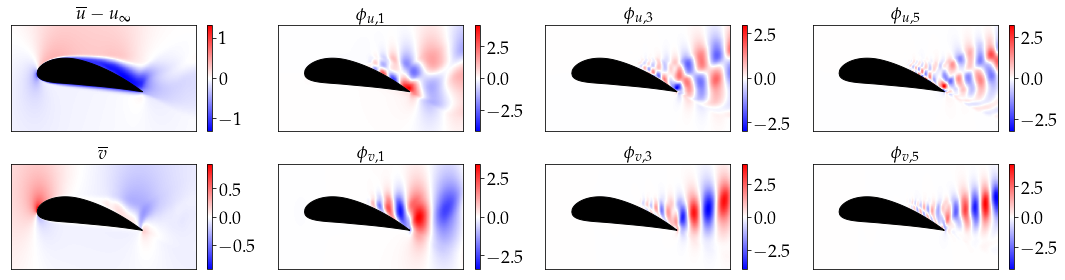

In [6]:
n_modes = 3
figure(figsize = (15,4))

label_fs = 18
tick_fs = 0

show_colorbar = True

mean_U_grid = interp(mean_flow[:n], Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
mean_V_grid = interp(mean_flow[n:], Cx, Cy, XX, YY, method='linear').reshape(ny,nx)

ax = subplot(2,n_modes+1,1)
max_abs = np.max(np.abs(mean_U_grid-1))
pcolor(XX,YY,mean_U_grid-1, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading='auto')
fill(wing_boundary_x, wing_boundary_y, c='k')
xlim([np.min(x),np.max(x)])
ylim([np.min(y),np.max(y)])
if show_colorbar:
    cbar = colorbar()
    cbar.ax.tick_params(labelsize=label_fs)
title(r'$\overline{u} - u_\infty$', fontsize = label_fs)
# ylabel('y', fontsize = label_fs)
xticks([],fontsize = 0)
yticks([],fontsize = tick_fs)
# ax.set_aspect('equal')

ax = subplot(2,n_modes+1,n_modes+2)
max_abs = np.max(np.abs(mean_V_grid))
pcolor(XX,YY,mean_V_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading='auto')
fill(wing_boundary_x, wing_boundary_y, c='k')
xlim([np.min(x),np.max(x)])
ylim([np.min(y),np.max(y)])
if show_colorbar:
    cbar = colorbar()
    cbar.ax.tick_params(labelsize=label_fs)
title(r'$\overline{v}$', fontsize = label_fs)
# xlabel('x', fontsize = label_fs)
# ylabel('y', fontsize = label_fs)
xticks([],fontsize = tick_fs)
yticks([],fontsize = tick_fs)
# ax.set_aspect('equal')

################################################################

plot_modes = [0,2,4]
PhiU_grid = [interp(Phi[:n,plot_modes[j]], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_modes)]
PhiV_grid = [interp(Phi[n:,plot_modes[j]], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_modes)]

for j in range(n_modes):
        
    ax = subplot(2,n_modes+1,j+2)
    
    max_abs = np.max(np.abs(PhiU_grid[j]))
    pcolor(XX,YY,PhiU_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading='auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    if show_colorbar:
        cbar = colorbar()
        cbar.ax.tick_params(labelsize=label_fs)
    title(r'$\phi_{u,'+str(plot_modes[j]+1)+'}$', fontsize = label_fs)
    xticks([])
    yticks([])
#     ax.set_aspect('equal')
        
    ax = subplot(2,n_modes+1,j+n_modes+3)
    max_abs = np.max(np.abs(PhiV_grid[j]))
    pcolor(XX,YY,PhiV_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading='auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    yticks([])
    if show_colorbar:
        cbar = colorbar()
        cbar.ax.tick_params(labelsize=label_fs)
    title(r'$\phi_{v,'+str(plot_modes[j]+1)+'}$', fontsize = label_fs)
    xticks([],fontsize = tick_fs)
#     ax.set_aspect('equal')
        
tight_layout()